# 1.IMDB评论数据分类

In [44]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Activation, Dense, Dropout, Input, Embedding, Flatten

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

import jieba  #分词
import re   #正则表达式


# 中文字体显示
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
from tensorflow.keras.datasets import imdb  # 数据集

# imdb数据加载，num_words: 需要保留的最大词数，基于词频。只有最常出现的 num_words 词会被保留。这里取常用词汇5000个，来组合成句子。
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000,  seed=528)

# 数据整形，对齐
x_train_sq = sequence.pad_sequences(x_train, maxlen = 500, padding='pre', truncating='pre')
x_test_sq = sequence.pad_sequences(x_test, maxlen = 500, padding='pre', truncating='pre')
print(x_train_sq.shape)
print(x_test_sq.shape)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must sp

(25000, 500)
(25000, 500)


In [6]:
def plot_loss(hs):
    plt.figure(figsize = (8,4))
    plt.plot(hs.history['loss'], label = 'Train')  
    plt.plot(hs.history['val_loss'],label = 'test')  
    plt.title('Model loss')  
    plt.ylabel('Loss')  
    plt.xlabel('Epoch')  
    plt.legend(loc=0)  # loc=0 表示最优位置，自动。也可以手动设置，如：'upper left'等
    plt.show()
    return

## SimpleRNN 

In [9]:
model=Sequential()
model.add(Embedding(input_dim=10000,output_dim=32,input_length=500))
model.add(SimpleRNN(30,activation='tanh',return_sequences=False))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer = RMSprop(lr=0.001),
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 30)                1890      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 321,921
Trainable params: 321,921
Non-trainable params: 0
_________________________________________________________________


In [10]:
model = Sequential()
model.add(Embedding(input_dim = 10000,    # 词汇表大小
                    output_dim = 32,    # 词向量维度
                    input_length = 500    # 输入序列的长度（pad_sequense之后）
                   ))

model.add(SimpleRNN(30, return_sequences=True))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = RMSprop(lr=0.001),
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 500, 30)           1890      
_________________________________________________________________
dense_2 (Dense)              (None, 500, 1)            31        
Total params: 321,921
Trainable params: 321,921
Non-trainable params: 0
_________________________________________________________________


In [12]:
rnn=model.fit(x_train_sq, y_train, 
          validation_data=(x_test_sq, y_test), 
          epochs=3, 
          batch_size=32, 
          verbose=1)

Epoch 1/3
782/782 [==============================] - 790s 1s/step - loss: 0.6312 - accuracy: 0.6101 - val_loss: 0.6748 - val_accuracy: 0.6030
Epoch 2/3
782/782 [==============================] - 792s 1s/step - loss: 0.5890 - accuracy: 0.6359 - val_loss: 0.6223 - val_accuracy: 0.6081
Epoch 3/3
782/782 [==============================] - 840s 1s/step - loss: 0.5768 - accuracy: 0.6369 - val_loss: 0.6733 - val_accuracy: 0.5982


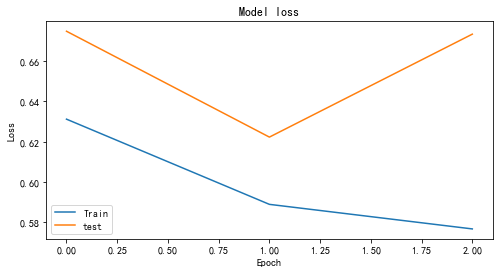

In [13]:
plot_loss(rnn)

## LSTM

In [4]:
def imdb_lstm():
    model = Sequential()
    model.add(Embedding(input_dim = 10000,    # 词汇表大小
                        output_dim = 32,    # 词向量维度
                        input_length = 500    # 输入序列的长度（pad_sequense之后）
                       ))
    model.add(LSTM(30, activation = 'tanh', return_sequences=False))
    model.add(Dense(1, activation='sigmoid'))

    # 模型编译
    model.compile(optimizer = RMSprop(lr=0.001),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    # 打印模型
    print(model.summary())
    return model
imdb_lstm_model = imdb_lstm()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
lstm (LSTM)                  (None, 30)                7560      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 327,591
Trainable params: 327,591
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
lstm = imdb_lstm_model.fit(x_train_sq, y_train, 
                          validation_data=(x_test_sq, y_test), 
                          epochs=5, batch_size=32, verbose=1)

Epoch 1/5
782/782 [==============================] - 29s 31ms/step - loss: 0.5056 - accuracy: 0.7405 - val_loss: 0.3832 - val_accuracy: 0.8533
Epoch 2/5
782/782 [==============================] - 23s 29ms/step - loss: 0.2581 - accuracy: 0.8993 - val_loss: 0.2855 - val_accuracy: 0.8822
Epoch 3/5
782/782 [==============================] - 23s 29ms/step - loss: 0.2135 - accuracy: 0.9203 - val_loss: 0.2862 - val_accuracy: 0.8832
Epoch 4/5
782/782 [==============================] - 22s 29ms/step - loss: 0.1921 - accuracy: 0.9297 - val_loss: 0.3092 - val_accuracy: 0.8766
Epoch 5/5
782/782 [==============================] - 22s 28ms/step - loss: 0.1760 - accuracy: 0.9360 - val_loss: 0.3838 - val_accuracy: 0.8390


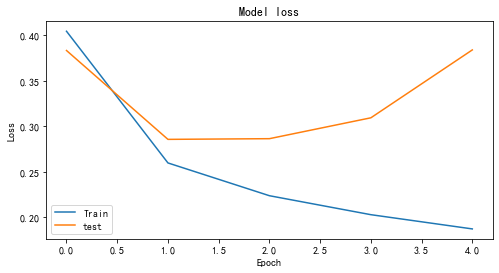

In [7]:
plot_loss(lstm)

In [8]:
#（节点*（向量+记忆）+偏置）*4
(30*(32+30)+30)*4

7560

# 2.中文新闻数据的十分类

## 1. 中文文本加载

In [45]:
train = pd.read_csv('./LSTM_news/small_news_train.csv')
val = pd.read_csv('./LSTM_news/small_news_test.csv')
test = pd.read_csv('./LSTM_news/small_news_val.csv')
train.shape, val.shape, test.shape

((5000, 4), (500, 4), (500, 4))

In [46]:
train.text[0]

'霍华德28+18魔术灭骑士 步行者击败篮网力保第八 新浪体育讯北京时间3月22日，步行者客场力取篮网；魔术在客场轻松过关，拿下骑士。以下是这两场比赛的综述：步行者102-篮网98(点击观看视频集锦)步行者(31-40)艰难过关。罗伊-希伯特拿下24分5个篮板，丹尼-格兰杰20分，达伦-科里森15分12次助攻。替补出场的约什-麦克罗伯茨14分，布兰顿-拉什10分7个篮板。篮网(22-47)四连败。德隆-威廉姆斯继续缺阵，布鲁克-洛佩斯得了20分，乔丹-法玛尔14分4次助攻，安东尼-莫罗12分6个篮板，克里斯-亨弗里斯9分14个篮板。替补出场的萨沙-武贾西奇得了14分，桑迪亚塔-盖恩斯18分。步行者保持东部第八的位置，不过只领先山猫和雄鹿一场半，所以剩下的每一场比赛都要全力以赴。篮网则已经基本没希望，所以也不急着让威廉姆斯复出。下半场步行者继续猛攻，本节最后3分37秒他们只让篮网投中一球，打出一波9-3后，69-61领先进入最后一节。篮网一度将差距缩小到4分，但格兰杰的拉什相继得手，步行者在末节将过半时以80-70再度拉开差距。篮网在终场前1分03秒由武贾西奇投中三分，将比分追成94-98，此后盖恩斯罚中一球，将差距缩小到3分。在一分钟内，他们三度投中三分，其中有两个出自武贾西奇之手。步行者连续投篮不中，给了篮网扳平的机会。盖恩斯关键时刻三分不中，武贾西奇的上篮也失手，篮网只得犯规，科里森两罚两中后，在终场前9.6秒以100-95领先。盖恩斯在终场前3.2秒终于三分命中，篮网只以98-100落后。科里森又两罚两中后，步行者保持4分的优势，锁定胜局。魔术97-骑士86魔术(45-26)三连胜。德怀特-霍华德拿下了28分18个篮板，他还盖帽4次，抢断4次。布兰顿-巴斯得了22分6个篮板，杰森-理查德森11分3个篮板。骑士(13-56)三连败，本赛季遭到横扫。JJ-希克森拿下了18分6个篮板，他是首发中唯一上双的球员。雷蒙-塞申斯9分、6个篮板和6次助攻。替补出场的丹尼尔-吉布森16分6次助攻，克里斯蒂安-艾恩加12分。拜伦-戴维斯继续缺阵。魔术重新找到感觉，靠的是出色的防守。上一场他们在最后时刻击败掘金，只让对手得了82分。面对骑士魔术打得较为轻松，不过上次交手时，霍华德陷入犯规困境，只得12分。今天霍华德全力进攻，还控制了篮板，魔术从第一节起就控制局面。霍华德四次篮下得

In [47]:
train['label'].value_counts(), val['label'].value_counts(), test['label'].value_counts()

(家居    500
 娱乐    500
 体育    500
 房产    500
 时尚    500
 时政    500
 财经    500
 教育    500
 科技    500
 游戏    500
 Name: label, dtype: int64,
 房产    50
 科技    50
 家居    50
 时尚    50
 教育    50
 财经    50
 时政    50
 游戏    50
 娱乐    50
 体育    50
 Name: label, dtype: int64,
 房产    50
 科技    50
 家居    50
 时尚    50
 教育    50
 财经    50
 时政    50
 游戏    50
 娱乐    50
 体育    50
 Name: label, dtype: int64)

In [48]:
train_y = train['label']
val_y = val['label']
test_y = test['label']

# 对标签数据进行编码0-9
le = LabelEncoder()
train_y = le.fit_transform(train_y)
val_y = le.transform(val_y)
test_y = le.transform(test_y)

class_names = list(le.classes_)
print(class_names)

['体育', '娱乐', '家居', '房产', '教育', '时尚', '时政', '游戏', '科技', '财经']


## 2. 分词 

In [49]:
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]   #line.strip() 去除开尾空格
    return stopwords
stopwords = stopwordslist('./LSTM_news/cn_stopwords.txt')
stopwords

['$',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '?',
 '_',
 '“',
 '”',
 '、',
 '。',
 '《',
 '》',
 '一',
 '一些',
 '一何',
 '一切',
 '一则',
 '一方面',
 '一旦',
 '一来',
 '一样',
 '一般',
 '一转眼',
 '万一',
 '上',
 '上下',
 '下',
 '不',
 '不仅',
 '不但',
 '不光',
 '不单',
 '不只',
 '不外乎',
 '不如',
 '不妨',
 '不尽',
 '不尽然',
 '不得',
 '不怕',
 '不惟',
 '不成',
 '不拘',
 '不料',
 '不是',
 '不比',
 '不然',
 '不特',
 '不独',
 '不管',
 '不至于',
 '不若',
 '不论',
 '不过',
 '不问',
 '与',
 '与其',
 '与其说',
 '与否',
 '与此同时',
 '且',
 '且不说',
 '且说',
 '两者',
 '个',
 '个别',
 '临',
 '为',
 '为了',
 '为什么',
 '为何',
 '为止',
 '为此',
 '为着',
 '乃',
 '乃至',
 '乃至于',
 '么',
 '之',
 '之一',
 '之所以',
 '之类',
 '乌乎',
 '乎',
 '乘',
 '也',
 '也好',
 '也罢',
 '了',
 '二来',
 '于',
 '于是',
 '于是乎',
 '云云',
 '云尔',
 '些',
 '亦',
 '人',
 '人们',
 '人家',
 '什么',
 '什么样',
 '今',
 '介于',
 '仍',
 '仍旧',
 '从',
 '从此',
 '从而',
 '他',
 '他人',
 '他们',
 '以',
 '以上',
 '以为',
 '以便',
 '以免',
 '以及',
 '以故',
 '以期',
 '以来',
 '以至',
 '以至于',
 '以致',
 '们',
 '任',
 '任何',
 '任凭',
 '似的',
 '但',
 '但凡',
 '但是',
 '何',
 '何以',
 '何况',
 '何处',
 '何时',
 '余外',
 '作为',
 '你',
 '你们'

In [50]:
def remove_otherwords(text):
    text = str(text)
    if text.strip()=='':
        return ''
    rule = re.compile(u"[^a-zA-Z0-9\u4E00-\u9FA5]")
    text = rule.sub(' ',text)
    return text
train['clean_text'] = train['text'].apply(remove_otherwords)
train.head(3)

,label,Unnamed: 1,label.1,text,clean_text
0,体育,4796,体育,霍华德28+18魔术灭骑士 步行者击败篮网力保第八 新浪体育讯北京时间3月22日，步行者客场...,霍华德28 18魔术灭骑士 步行者击败篮网力保第八 新浪体育讯北京时间3月22日 步行者客场...
1,体育,1739,体育,火箭新星：李小龙是我表哥 从小看着米勒时刻长大新浪体育讯对于库特尼-李，你都知道些什么？当年...,火箭新星 李小龙是我表哥 从小看着米勒时刻长大新浪体育讯对于库特尼 李 你都知道些什么 当年...
2,体育,3486,体育,大宝贝暴扣玩砸无伤大雅 实为替补他却让对手低头新浪体育讯北京时间2月14日凌晨，NBA东部联...,大宝贝暴扣玩砸无伤大雅 实为替补他却让对手低头新浪体育讯北京时间2月14日凌晨 NBA东部联...


In [51]:
train['cut_text'] = train['clean_text'].apply(lambda x: " ".join([w for w in list(jieba.cut(x)) if w not in stopwords]))
train.head(3)

,label,Unnamed: 1,label.1,text,clean_text,cut_text
0,体育,4796,体育,霍华德28+18魔术灭骑士 步行者击败篮网力保第八 新浪体育讯北京时间3月22日，步行者客场...,霍华德28 18魔术灭骑士 步行者击败篮网力保第八 新浪体育讯北京时间3月22日 步行者客场...,霍华德 28 18 魔术 灭 骑士 步行者 击败 篮网 力保 第八 新浪 体育讯...
1,体育,1739,体育,火箭新星：李小龙是我表哥 从小看着米勒时刻长大新浪体育讯对于库特尼-李，你都知道些什么？当年...,火箭新星 李小龙是我表哥 从小看着米勒时刻长大新浪体育讯对于库特尼 李 你都知道些什么 当年...,火箭 新星 李小龙 表哥 从小 看着 米勒 时刻 长大 新浪 体育讯 库特 尼 ...
2,体育,3486,体育,大宝贝暴扣玩砸无伤大雅 实为替补他却让对手低头新浪体育讯北京时间2月14日凌晨，NBA东部联...,大宝贝暴扣玩砸无伤大雅 实为替补他却让对手低头新浪体育讯北京时间2月14日凌晨 NBA东部联...,宝贝 暴扣 玩 砸 无伤大雅 实为 替补 对手 低头 新浪 体育讯 北京 时间 月 14...


In [52]:
# 计算分词后的句子的分词数量
train['cut_words_num'] = train['cut_text'].str.split(" ").apply(len)
train['cut_words_num'].describe()

count     5000.000000
mean       500.418400
std        501.491861
min          8.000000
25%        196.750000
50%        383.000000
75%        630.000000
max      10708.000000
Name: cut_words_num, dtype: float64

In [53]:
# 定义一个数据预处理的函数：
def text_process(df,stopwords):
    # （1）生成“干净”的文本
    df['clean_text'] = df['text'].apply(remove_otherwords)  
    # （2）分词，并过滤停用词
    df['cut_text'] = df['clean_text'].apply(lambda x: " ".join([w for w in list(jieba.cut(x)) if w not in stopwords]))   
    # （3）计算分词后的句子的分词数量
    df['cut_words_num'] = df['cut_text'].str.split(" ").apply(len)
    return df

In [54]:
stopwords = stopwordslist('./LSTM_news/cn_stopwords.txt')
train = text_process(train,stopwords)
val = text_process(val,stopwords)
test = text_process(test,stopwords)
train.head(3), val.head(3), test.head(3)

(  label  Unnamed: 1 label.1  \
 0    体育        4796      体育   
 1    体育        1739      体育   
 2    体育        3486      体育   
 
                                                 text  \
 0  霍华德28+18魔术灭骑士 步行者击败篮网力保第八 新浪体育讯北京时间3月22日，步行者客场...   
 1  火箭新星：李小龙是我表哥 从小看着米勒时刻长大新浪体育讯对于库特尼-李，你都知道些什么？当年...   
 2  大宝贝暴扣玩砸无伤大雅 实为替补他却让对手低头新浪体育讯北京时间2月14日凌晨，NBA东部联...   
 
                                           clean_text  \
 0  霍华德28 18魔术灭骑士 步行者击败篮网力保第八 新浪体育讯北京时间3月22日 步行者客场...   
 1  火箭新星 李小龙是我表哥 从小看着米勒时刻长大新浪体育讯对于库特尼 李 你都知道些什么 当年...   
 2  大宝贝暴扣玩砸无伤大雅 实为替补他却让对手低头新浪体育讯北京时间2月14日凌晨 NBA东部联...   
 
                                             cut_text  cut_words_num  
 0  霍华德 28   18 魔术 灭 骑士   步行者 击败 篮网 力保 第八   新浪 体育讯...            708  
 1  火箭 新星   李小龙 表哥   从小 看着 米勒 时刻 长大 新浪 体育讯 库特 尼   ...            889  
 2  宝贝 暴扣 玩 砸 无伤大雅   实为 替补 对手 低头 新浪 体育讯 北京 时间 月 14...            527  ,
   label  Unnamed: 1 label.1  \
 0    体育         764      体育   
 1    体育         532      体育   
 2    体育         123      体育 

In [55]:
train.to_csv('./LSTM_news/train_cut.csv', encoding = 'utf-8')
val.to_csv('./LSTM_news/val_cut.csv', encoding = 'utf-8')
test.to_csv('./LSTM_news/test_cut.csv', encoding = 'utf-8')
print("write successfully")

write successfully


## 3. 词汇编码 

In [56]:
# num_words: 需要保留的最大词数，基于词频。只有最常出现的 num_words 词会被保留。
    
tok = Tokenizer(num_words = 5000)   # 使用的最大词语数为5000
tok.fit_on_texts(train['cut_text'])  # 直接用train里面cut好的句子来fit
tok

In [57]:
# 使用word_index属性可以看到每次词对应的编码
# 使用word_counts属性可以看到每个词对应的频数
print("编码：")
for ii,iterm in enumerate(tok.word_index.items()):  #enumerate 枚举类型
    if ii < 8:
        print(iterm)
    else:
        break
print("频数：")  
for ii,iterm in enumerate(tok.word_counts.items()):
    if ii < 8:
        print(iterm)
    else:
        break

编码：
('中', 1)
('月', 2)
('一个', 3)
('年', 4)
('会', 5)
('中国', 6)
('说', 7)
('基金', 8)
频数：
('霍华德', 107)
('28', 419)
('18', 690)
('魔术', 183)
('灭', 9)
('骑士', 198)
('步行者', 98)
('击败', 153)


## 4. 句子对齐 

In [58]:
#使用tok.texts_to_sequences()：将按“ ”切分的文本 → 序列。
train_seq = tok.texts_to_sequences(train['cut_text'])
val_seq = tok.texts_to_sequences(val['cut_text'])
test_seq = tok.texts_to_sequences(test['cut_text'])

In [59]:
#使用sequence.pad_sequences()：将每个序列调整为相同的长度。
max_len = 500
train_seq_mat = sequence.pad_sequences(train_seq, maxlen = max_len)  # max_len = 600
val_seq_mat = sequence.pad_sequences(val_seq, maxlen = max_len)
test_seq_mat = sequence.pad_sequences(test_seq, maxlen = max_len)

print(train_seq_mat.shape)
print(val_seq_mat.shape)
print(test_seq_mat.shape)

train_seq_mat[:2]

(5000, 500)
(500, 500)
(500, 500)


array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

## 5. 构建并训练模型

In [82]:
def get_lstm_news_model():
    model = Sequential()
    model.add(Embedding(input_dim = 5000,    # 词汇表大小
                        output_dim = 64,    # 词向量维度
                        input_length = 500    # 输入序列的长度（pad_sequense之后）
                       ))
    model.add(LSTM(32, activation = 'tanh', return_sequences=False))
    model.add(Dense(10, activation='softmax'))

    # 模型编译
    model.compile(optimizer = RMSprop(lr=0.001),
                  loss='sparse_categorical_crossentropy',  
                  metrics=['accuracy'])
    # 打印模型
    print(model.summary())
    return model
lstm_news = get_lstm_news_model()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 500, 64)           320000    
_________________________________________________________________
lstm_10 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                330       
Total params: 332,746
Trainable params: 332,746
Non-trainable params: 0
_________________________________________________________________
None


In [83]:
lstm_hs = lstm_news.fit(train_seq_mat, train_y, 
                          validation_data=(val_seq_mat, val_y), 
                          epochs=5, batch_size=32, verbose=1)

Epoch 1/5
157/157 [==============================] - 6s 24ms/step - loss: 2.0870 - accuracy: 0.2892 - val_loss: 1.3960 - val_accuracy: 0.6360
Epoch 2/5
157/157 [==============================] - 3s 21ms/step - loss: 1.2026 - accuracy: 0.6767 - val_loss: 1.0356 - val_accuracy: 0.6940
Epoch 3/5
157/157 [==============================] - 3s 21ms/step - loss: 0.7055 - accuracy: 0.8445 - val_loss: 0.6659 - val_accuracy: 0.8380
Epoch 4/5
157/157 [==============================] - 3s 21ms/step - loss: 0.4135 - accuracy: 0.9187 - val_loss: 0.5302 - val_accuracy: 0.8500
Epoch 5/5
157/157 [==============================] - 3s 21ms/step - loss: 0.2655 - accuracy: 0.9429 - val_loss: 0.4542 - val_accuracy: 0.8780


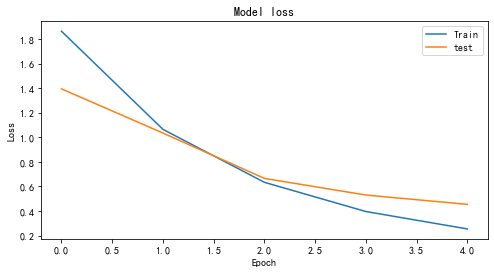

In [84]:
plot_loss(lstm_hs)

## 6. 查看在验证集val上的效果

In [85]:
val_pre=lstm_news.predict(val_seq_mat)  

In [90]:
val_pre_class = np.argmax(val_pre, axis = 1)
print('前30个test样本的预测值为： ',val_pre_class[:50])
print('前30个test样本的真实值为： ',val_y[:50])

前30个test样本的预测值为：  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0]
前30个test样本的真实值为：  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


## 7.将模型应用到测试集test上，看测试集上的分类报告。 

In [91]:
from sklearn.metrics import classification_report

lstm_news_rep = np.argmax(lstm_news.predict(test_seq_mat), axis = 1)
print("test上的分类报告如下：\n",classification_report(test_y, lstm_news_rep))

test上的分类报告如下：
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.96      0.92      0.94        50
           2       0.76      0.32      0.45        50
           3       1.00      0.76      0.86        50
           4       0.80      0.78      0.79        50
           5       0.82      1.00      0.90        50
           6       0.70      0.80      0.75        50
           7       0.96      0.92      0.94        50
           8       0.63      0.98      0.77        50
           9       0.92      0.96      0.94        50

    accuracy                           0.84       500
   macro avg       0.85      0.84      0.83       500
weighted avg       0.85      0.84      0.83       500



# 总结

In [78]:
#one-hot categorical_crossentropy
#数字 sparse_categorical_crossentropy
#二分类交叉熵 搭配sigmod binary_crossentropy